In [ ]:
# import libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Binarizer
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import seaborn as sns
from scipy.special import factorial
np.random.seed(1234)
import requests
stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stopwords = set(stopwords_list.decode().splitlines()) 
#print(len(stopwords))

plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore") #suppresses all warnings

# import anxieties
# anxietities.filteranxieties("ignore") #we sincerely wish that this function exists




In [ ]:
# the vectorizers

#vectorizer = CountVectorizer(stop_words = stopwords,max_df = 0.5)
vectorizer = CountVectorizer(stop_words = stopwords,max_df = 0.5,max_features = 5000)
vectorizer_untrimed = CountVectorizer()

#vectorizer_tfid = TfidfVectorizer(max_features = 5000)
vectorizer_tfid = TfidfVectorizer(stop_words = stopwords,max_df = 0.8)
vectorizer_untrimed_tfid = TfidfVectorizer()

from sklearn.decomposition import TruncatedSVD
pcb = TruncatedSVD(n_components=1000)

ONEHOT_THRESHOLD = 0.1
vectorizer_onehot = Binarizer(threshold=ONEHOT_THRESHOLD)

#**Task 1**

##Import the 20newsgroups Dataset and Extract Features

In [ ]:
# import the '20 news groups' dataset
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_selection import VarianceThreshold
twentyNG_train = fetch_20newsgroups(subset='train', remove=(['headers', 'footers', 'quotes']))
twentyNG_test = fetch_20newsgroups(subset='test', remove=(['headers', 'footers', 'quotes']))
x_train_20, x_test_20, y_train_20, y_test_20 = twentyNG_train.data, twentyNG_test.data, twentyNG_train.target, twentyNG_test.target

The total number of samples is 18846


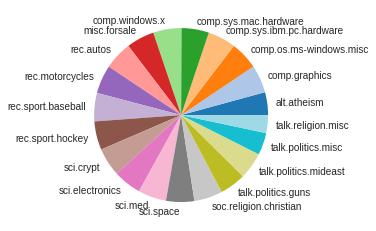

In [ ]:
print("The total number of samples is", len(x_train_20)+len(x_test_20))
# plot classes
colors = sns.color_palette('tab20')
classes, counts = np.unique(twentyNG_train.target, return_counts=True)
plt.pie(counts, labels = twentyNG_train.target_names, colors = colors)
plt.show()

count dataset (used for Multinomial)



In [ ]:
# feature extraction with countvectorizer
x_train_vec_20 = vectorizer.fit_transform(x_train_20)
x_test_vec_20 = vectorizer.transform(x_test_20)

x_train_vec_20_untrimed = vectorizer_untrimed.fit_transform(x_train_20)#stores the data pre-feature-selection
x_test_vec_20_untrimed = vectorizer_untrimed.transform(x_test_20)

#x_train_vec_20 = x_train_vec_20.toarray() #turns the trimed data into ndarray
#x_test_vec_20 = x_test_vec_20.toarray()
'''We don't use PCA here because it makes the performance worse for Multinomial'''

# from sklearn.decomposition import TruncatedSVD
# pca = TruncatedSVD(n_components=2000)

# x_train_vec_20 = pca.fit_transform(x_train_vec_20)
# x_test_vec_20 = pca.fit_transform(x_test_vec_20)



"We don't use PCA here because it makes the performance worse for Multinomial"

tfid dataset (used for Gaussian)

In [ ]:
#feature extraction with tfidvectorizer 
x_train_vec_20_tfid = vectorizer_tfid.fit_transform(x_train_20)
x_test_vec_20_tfid = vectorizer_tfid.transform(x_test_20)

x_train_vec_20_untrimed_tfid = vectorizer_untrimed_tfid.fit_transform(x_train_20)#stores the data pre-feature-selection
x_test_vec_20_untrimed_tfid = vectorizer_untrimed_tfid.transform(x_test_20)

from sklearn.decomposition import TruncatedSVD
pcb = TruncatedSVD(n_components=1000)
x_train_vec_20_tfid = pcb.fit_transform(x_train_vec_20_tfid)
x_test_vec_20_tfid = pcb.fit_transform(x_test_vec_20_tfid)

# x_train_vec_20_tfid = x_train_vec_20_tfid.toarray()
# x_test_vec_20_tfid = x_test_vec_20_tfid.toarray() 


binary dataset (used for Bernoulli)

In [ ]:
#feature extraction with binarizer 
x_train_vec_20_onehot = vectorizer_onehot.transform(x_train_vec_20_tfid)
x_test_vec_20_onehot = vectorizer_onehot.transform(x_test_vec_20_tfid)


'''We don't use PCA here because it makes the performance worse for Bernoulli'''
# from sklearn.decomposition import TruncatedSVD
# pcc = TruncatedSVD(n_components=2000)
# x_train_vec_20_onehot = pcc.fit_transform(x_train_vec_20_onehot)
# x_test_vec_20_onehot = pcc.fit_transform(x_test_vec_20_onehot)

# #variance threshold for the bernoulli (bianry) dataset
# sel = VarianceThreshold(threshold=(.4 * (1 - .4)))
# sel.fit_transform(x_train_vec_20_onehot)
# sel.fit_transform(x_test_vec_20_onehot)


"We don't use PCA here because it makes the performance worse for Bernoulli"

In [ ]:
#print(x_train_vec_20.shape)

##Import the sentiment140 Dataset and Extract Features

In [ ]:
# import the Sentiment140 dataset
resp = urlopen("http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip")
zipfile = ZipFile(BytesIO(resp.read()))

# store data in pandas dataframe
headers = ['polarity', 'tweet_id', 'date', 'query', 'user', 'text']
sentiment_train = pd.read_csv(zipfile.open('training.1600000.processed.noemoticon.csv'), encoding='cp1252', names=headers)
sentiment_train = sentiment_train.sample(frac=1).reset_index(drop=True) # shuffle dataset
sentiment_test = pd.read_csv(zipfile.open('testdata.manual.2009.06.14.csv'), encoding='cp1252', names=headers)
sentiment_test = sentiment_test[sentiment_test['polarity'] != 2]

# turn polarity column into numpy array
y_train_140 = sentiment_train['polarity'].to_numpy()
y_test_140 = sentiment_test['polarity'].to_numpy()
# turn text column into list
x_train_140 = sentiment_train['text'].tolist()
x_test_140 = sentiment_test['text'].tolist()

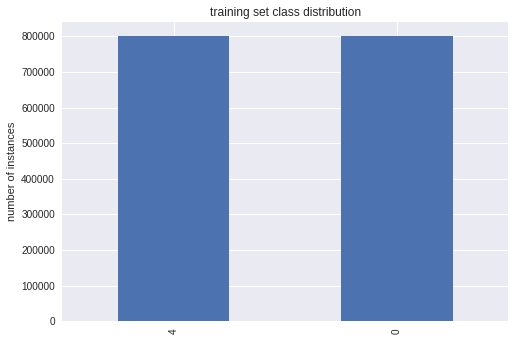

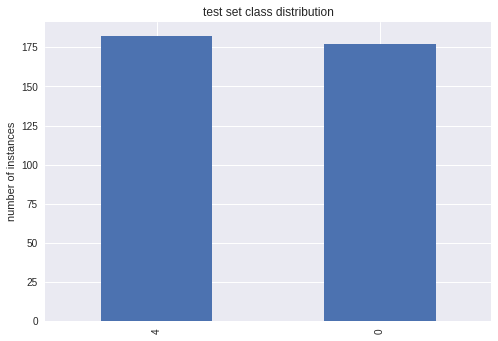

In [ ]:
# plot class distribution
sentiment_train['polarity'].value_counts().plot(ylabel='number of instances', kind='bar', title='training set class distribution')
plt.show()
sentiment_test['polarity'].value_counts().plot(ylabel='number of instances', kind='bar', title='test set class distribution')
plt.show()

In [ ]:
# feature extraction with countvectorizer
x_train_vec_140 = vectorizer.fit_transform(x_train_140)
x_test_vec_140 = vectorizer.transform(x_test_140)
#stores the data pre-feature-selection
#x_train_vec_140_untrimed = vectorizer_untrimed.fit_transform(x_train_140)
#x_test_vec_140_untrimed = vectorizer_untrimed.transform(x_test_140)

# shrink dataset size
y_train_140_shrink = y_train_140[:100000]
x_train_140_shrink = x_train_140[:100000]

# feature extraction with tfidvectorizer
x_train_vec_140_tfid = vectorizer_tfid.fit_transform(x_train_140_shrink)
x_test_vec_140_tfid = vectorizer_tfid.transform(x_test_140)
x_train_vec_140_tfid = pcb.fit_transform(x_train_vec_140_tfid)
x_test_vec_140_tfid = pcb.fit_transform(x_test_vec_140_tfid)

#feature extraction with binarizer 
x_train_vec_140_onehot = vectorizer_onehot.transform(x_train_vec_140_tfid)
x_test_vec_140_onehot = vectorizer_onehot.transform(x_test_vec_140_tfid)

# **Task 2**


## Implement Naive Bayes Models

###Option 1: Gaussian Naive Bayes 

In [ ]:
class GaussianNaiveBayes:
    
    def __init__(self):
        return
    
    def fit(self, x, y):
        N, D = x.shape
        C = np.max(y) + 1
        # one parameter for each feature conditioned on each class
        mu, sigma = np.zeros((C,D)), np.zeros((C,D))
        Nc = np.zeros(C) # number of instances in class c
        # for each class get the MLE for the mean and std
        for c in range(C):
            x_c = x[y == c]                           #slice all the elements from class c
            Nc[c] = x_c.shape[0]                      #get number of elements of class c
            mu[c,:] = np.mean(x_c,0)                  #mean of features of class c
            sigma[c,:] = np.std(x_c, 0)               #std of features of class c
            
        self.mu = mu                                  # C x D
        self.sigma = sigma                            # C x D
        self.pi = (Nc+1)/(N+C)                        #Laplace smoothing (using alpha_c=1 for all c) you can derive using Dirichlet's distribution
        return self

In [ ]:
def logsumexp(Z):                                                # dimension C x N
    Zmax = np.max(Z,axis=0)[None,:]                              # max over C
    log_sum_exp = Zmax + np.log(np.sum(np.exp(Z - Zmax), axis=0))
    return log_sum_exp

def Gpredict(self, xt):
    Nt, D = xt.shape
    # for numerical stability we work in the log domain
    # we add a dimension because this is added to the log-likelihood matrix 
    # that assigns a likelihood for each class (C) to each test point, and so it is C x N
    log_prior = np.log(self.pi)[:, None]
    # logarithm of the likelihood term for Gaussian 
    # the first two terms are the logarithm of the normalization term in the Gaussian and the final term is the exponent in the Gaussian. 
    # Notice that we are adding dimensions (using None) to model parameters and data to make this evaluation. 
    # The reason is that sigma and mu are C x D, while the data x is N x D. We operate on a C x N x D shape by increasing the number of dimensions when needed
    log_likelihood = -.5 * np.log(2*np.pi) - np.log(self.sigma[:,None,:]) -.5 * (((xt[None,:,:] - self.mu[:,None,:])/self.sigma[:,None,:])**2)
    # now we sum over the feature dimension to get a C x N matrix (this has the log-likelihood for each class-test point combination)
    log_likelihood = np.sum(log_likelihood, axis=2)
    # posterior calculation
    log_posterior = log_prior + log_likelihood
    posterior = np.exp(log_posterior - logsumexp(log_posterior))
    return posterior.T                                                  # dimension N x C

GaussianNaiveBayes.predict = Gpredict

###Option 2: Multinomial Naive Bayes

In [ ]:
class MultinomialNaiveBayes:

    def __init__(self,alpha=1):
        self.alpha = alpha # Smoothing Hyperparameter; note that we only have alpha but not beta because there are too many features 
        return
      
    def fit(self, x, y):
        N, D = x.shape
        C = np.max(y) + 1
        # one parameter for each feature conditioned on each class
        thetas = np.zeros((C, D))  
        # number of instances in each class
        Nc = np.zeros(C) 
        
        # for each class get the MLE for each theta
        for c in range(C):
            x_c = x[y == c]
            Nc[c] = x_c.shape[0] 
            denominator = np.sum(x_c.sum(axis=0) + self.alpha)               # total word count in all documents labelled c
            numerator = x_c.sum(axis=0) + self.alpha        # counst of word d in all documents labelled c
            thetas[c,:] = numerator/denominator   # theta for each feature for each class
        
        self.thetas = thetas                      # C x D
        self.pi = (Nc+1)/(N+C)                    # Laplace Smoothing
        return self


In [ ]:
def logsumexp(Z):                                                # dimension C x N
    Zmax = np.max(Z,axis=0)[None,:]                              # max over C
    log_sum_exp = Zmax + np.log(np.sum(np.exp(Z - Zmax), axis=0))
    return log_sum_exp

def Mpredict(self,xt):

    Nt, D = xt.shape
    # for numerical stability we work in the log domain
    # we add a dimension because this is added to the log-likelihood matrix 
    # that assigns a likelihood for each class (C) to each test point, and so it is C x N
    log_prior = np.log(self.pi)[:, None]
    # logarithm of the likelihood term for Multinomial
    '''
    # normalizing factor 
    numerator = factorial(xt.sum(axis=1))
    denominator = 1
    for d in range(D):
        denominator *= factorial(xt[:,d])
    normalizing_factor = numerator/denominator
    '''
    log_likelihood = np.log(self.thetas) * xt.T # dot product resulting in C x N
    # posterior calculation
    log_posterior = log_prior + log_likelihood
    posterior = np.exp(log_posterior - logsumexp(log_posterior))
    return posterior.T              

MultinomialNaiveBayes.predict = Mpredict

###Option 3: Bernoulli Naive Bayes

In [ ]:
class BernoulliNaiveBayes:

    def __init__(self,alpha=1,beta=1):
        self.alpha = alpha # Smoothing Hyperparameter
        self.beta = beta   # Smoothing Hyperparameter
        return
      
    def fit(self, x, y):
        N, D = x.shape
        C = np.max(y) + 1
        # one parameter for each feature conditioned on each class
        thetas = np.zeros((C, D))  
        # number of instances in each class
        Nc = np.zeros(C) 
        
        # for each class get the MLE for each theta
        for c in range(C):
            x_c = x[y == c]
            Nc[c] = x_c.shape[0] 
            numerator = self.alpha + x_c.sum(axis=0)
            denominator = self.alpha + self.beta + x_c.shape[0]            # total word count in all documents labelled c
            thetas[c,:] = numerator/denominator   # theta for each feature for each class
        
        self.thetas = thetas                      # C x D
        self.pi = (Nc+1)/(N+C)                    # Laplace Smoothing
        return self

In [ ]:
def logsumexp(Z):                                                # dimension C x N
    Zmax = np.max(Z,axis=0)[None,:]                              # max over C
    log_sum_exp = Zmax + np.log(np.sum(np.exp(Z - Zmax), axis=0))
    return log_sum_exp

def Bpredict(self,xt):

    Nt, D = xt.shape
    # for numerical stability we work in the log domain
    # we add a dimension because this is added to the log-likelihood matrix 
    # that assigns a likelihood for each class (C) to each test point, and so it is C x N
    log_prior = np.log(self.pi)[:, None]
    log_likelihood = np.log(self.thetas[:,None,:]**(xt[None,:,:]))
    # now we sum over the feature dimension to get a C x N matrix (this has the log-likelihood for each class-test point combination)
    # posterior calculation
    log_posterior = log_prior + np.sum(log_likelihood, axis=2)
    posterior = np.exp(log_posterior - logsumexp(log_posterior))
    posterior = posterior/(posterior.sum(axis=0)) # normalization 
    return posterior.T              

BernoulliNaiveBayes.predict = Bpredict

##Evaluation Function 

In [ ]:
# evaluate_acc takes in true labels and target labels and output accuracy score
def evaluate_acc(y_true, y_pred):
    accuracy = np.sum(y_pred == y_true)/y_pred.shape[0]
    print(f"model accuracy: {accuracy}")

## Implement k-fold Cross Validation

In [ ]:
# k is the number of folds, x and y are training data
def cross_validation_split(x, y, k=5): #assignment specified to use k=5 for cross validation
    (N,D), C = x.shape, np.max(y)+1
    inds = np.random.permutation(N)  # shuffle the data before splitting 
    #split the dataset into train and validation set
    n_val = N//k
    for i in range(k):
        tr_inds = []
        # get the validation indices
        val_inds = list(range(i*n_val, (i+1)*n_val))
        # get the train indices
        if i > 0:
            tr_inds = list(range(i*n_val))
        if i < k - 1:
            tr_inds = tr_inds + list(range((i+1)*n_val, N))
        yield x[inds[tr_inds]], y[inds[tr_inds]], x[inds[val_inds]], y[inds[val_inds]]


In [ ]:
def kfoldCV(data, model):
    error = 0
    for i, (x_train, y_train, x_val, y_val) in enumerate(data):
        model.fit(x_train, y_train)
        y_prob = model.predict(x_val)
        y_pred = np.argmax(y_prob, 1)
        accuracy = np.sum(y_pred == y_val)/y_pred.shape[0]
        #print(accuracy)
        error += (1-accuracy)
    k = i+1 
    return error/k # return average error 

In [ ]:
def kfoldCV_sklearn(data, model):
    error = 0
    for i, (x_train, y_train, x_val, y_val) in enumerate(data):
        model.fit(x_train, y_train)
        accuracy = model.score(x_val,y_val)
        error += (1-accuracy)
    k = i+1
    return error/k # return average error 

#**Task 3**

##Logistic Regression Model Hyperparameter Tuning 

Dataset 1

In [ ]:
from sklearn.linear_model import LogisticRegression
#using feature selected (trimmed) data
MAX_ITERs = [100,100,300,500,700,900]
ACCs = [0,0,0,0,0,0]
for i in range(len(MAX_ITERs)):
  if (i == 0):
    data = cross_validation_split(x_train_vec_20_untrimed,y_train_20,k=5)
    clf = LogisticRegression(random_state=0, max_iter= MAX_ITERs[i])
    error = kfoldCV_sklearn(data,clf)
    score = 100*(1-error)
    print("The accuracy for logistic regression model (without feature selection) is: ", score,"with the max iter being ",MAX_ITERs[i])
    ACCs[i] = score
  else:
    data = cross_validation_split(x_train_vec_20,y_train_20,k=5)
    clf = LogisticRegression(random_state=0, max_iter= MAX_ITERs[i])
    error = kfoldCV_sklearn(data,clf)
    score = 100*(1-error)
    print("The accuracy for logistic regression model is: ", score,"with the max iter being ",MAX_ITERs[i])
    ACCs[i] = score



The accuracy for logistic regression model (without feature selection) is:  66.28647214854111 with the max iter being  100
The accuracy for logistic regression model is:  65.70291777188328 with the max iter being  100
The accuracy for logistic regression model is:  65.72944297082228 with the max iter being  300
The accuracy for logistic regression model is:  65.57913351016799 with the max iter being  500
The accuracy for logistic regression model is:  65.39345711759505 with the max iter being  700
The accuracy for logistic regression model is:  65.52608311229001 with the max iter being  900


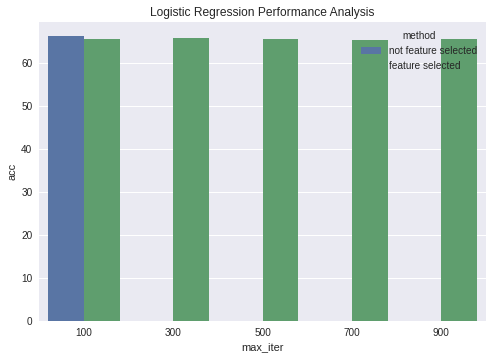

In [ ]:
import matplotlib.pyplot as plt

temp = {'max_iter': MAX_ITERs, 'acc': ACCs,'method':['not feature selected','feature selected','feature selected','feature selected','feature selected','feature selected']} 
df = pd.DataFrame(temp)
sns.color_palette("pastel")
plt.title("Logistic Regression Performance Analysis")
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [5, 2.5]
sns.barplot(x= "max_iter", y="acc", data= df,hue='method')

In [ ]:
from sklearn.linear_model import LogisticRegression
#using feature selected (trimmed) data
ACCs = [0,0]
data = cross_validation_split(x_train_vec_20,y_train_20,k=5)
clf = LogisticRegression(random_state=0, penalty='none')
error = kfoldCV_sklearn(data,clf)
score = 100*(1-error)
print("The accuracy for logistic regression model is: ", score,"with no penalty")
ACCs[0] = score

data = cross_validation_split(x_train_vec_20,y_train_20,k=5)
clf = LogisticRegression(random_state=0, penalty='l2')
error = kfoldCV_sklearn(data,clf)
score = 100*(1-error)
print("The accuracy for logistic regression model is: ", score,"with l2 penalty")
ACCs[1] = score


The accuracy for logistic regression model is:  64.0760389036251 with no penalty
The accuracy for logistic regression model is:  65.44650751547303 with l2 penalty


Dataset 2

In [ ]:
from sklearn.linear_model import LogisticRegression
#using feature selected (trimmed) data
MAX_ITERs = [100,300,500,700,900]
ACCs = [0,0,0,0,0]
for i in range(len(MAX_ITERs)):
    data = cross_validation_split(x_train_vec_140,y_train_140,k=5)
    clf = LogisticRegression(random_state=0, max_iter= MAX_ITERs[i])
    error = kfoldCV_sklearn(data,clf)
    score = 100*(1-error)
    print("The accuracy for logistic regression model is: ", score,"with the max iter being ",MAX_ITERs[i])
    ACCs[i] = score

The accuracy for logistic regression model is:  73.6225625 with the max iter being  100
The accuracy for logistic regression model is:  73.603125 with the max iter being  300
The accuracy for logistic regression model is:  73.6175625 with the max iter being  500
The accuracy for logistic regression model is:  73.62675 with the max iter being  700
The accuracy for logistic regression model is:  73.6158125 with the max iter being  900


In [ ]:
from sklearn.linear_model import LogisticRegression
#using feature selected (trimmed) data
ACCs = [0,0]
data = cross_validation_split(x_train_vec_140,y_train_140,k=5)
clf = LogisticRegression(random_state=0, penalty='none')
error = kfoldCV_sklearn(data,clf)
score = 100*(1-error)
print("The accuracy for logistic regression model is: ", score,"with no penalty")
ACCs[0] = score

data = cross_validation_split(x_train_vec_140,y_train_140,k=5)
clf = LogisticRegression(random_state=0, penalty='l2')
error = kfoldCV_sklearn(data,clf)
score = 100*(1-error)
print("The accuracy for logistic regression model is: ", score,"with l2 penalty")
ACCs[1] = score

The accuracy for logistic regression model is:  73.60793749999999 with no penalty
The accuracy for logistic regression model is:  73.600375 with l2 penalty


##Naive Bayes Model Selection 

NOT USED: Effects of Bernoulli NB threshold value on performance


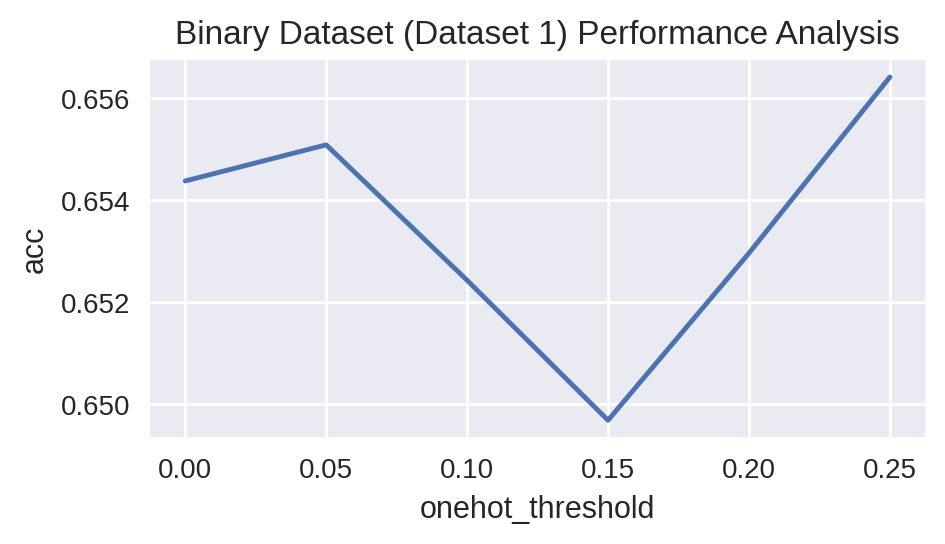

In [ ]:
ONEHOT_THRESHOLDs = [0.0,0.05,0.1,0.15,0.2,0.25]
ONEHOT_ACCs = [0,0,0,0,0,0]
vectorizer_bi_tfid = TfidfVectorizer(max_features = 5000)
x_train_vec_20_bi = vectorizer_bi_tfid.fit_transform(x_train_20)#stores the data pre-feature-selection

#stop_words = stopwords,max_df = 0.8


for i in range(len(ONEHOT_THRESHOLDs)):
  vectorizer_onehot = Binarizer(threshold=ONEHOT_THRESHOLD)
  x_train_vec_20_onehot = vectorizer_onehot.transform(x_train_vec_20_bi)
  x_train_vec_20_onehot = x_train_vec_20_onehot.toarray()

  ONEHOT_ACCs[i] = 1 - kfoldCV(cross_validation_split(x_train_vec_20_onehot, y_train_20),BernoulliNaiveBayes())

import matplotlib.pyplot as plt

temp_dict = {'onehot_threshold': ONEHOT_THRESHOLDs, 'acc': ONEHOT_ACCs} 
df = pd.DataFrame(temp_dict)
sns.color_palette("pastel")
plt.title("Binary Dataset (Dataset 1) Performance Analysis")
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [5, 2.5]
sns.lineplot(x= "onehot_threshold", y="acc", data= df)

Comparing performance across the three Naive Bayes Models with cross validation

Dataset 1

In [ ]:
print("For Dataset 1 Naive Bayes Model:")


Gaussian_error = kfoldCV(cross_validation_split(x_train_vec_20_tfid, y_train_20),GaussianNaiveBayes())
Multinomial_error = kfoldCV(cross_validation_split(x_train_vec_20, y_train_20),MultinomialNaiveBayes())
Bernoulli_error = kfoldCV(cross_validation_split(x_train_vec_20_onehot, y_train_20),BernoulliNaiveBayes())

print("Cross Validation Accuracy for Gaussian is: ", (1 - Gaussian_error))
print("Cross Validation Accuracy for Multinomial is: ", (1 - Multinomial_error))
print("Cross Validation Accuracy for Bernoulli is: ", (1 - Bernoulli_error))


For Dataset 1 Naive Bayes Model:
Cross Validation Accuracy for Gaussian is:  0.4969938107869142
Cross Validation Accuracy for Multinomial is:  0.6469496021220159
Cross Validation Accuracy for Bernoulli is:  0.6517241379310346


Dataset 2

In [ ]:
print("For Dataset 2 Naive Bayes Model:")


Gaussian_error = kfoldCV(cross_validation_split(x_train_vec_140_tfid, y_train_140_shrink),GaussianNaiveBayes())
Multinomial_error = kfoldCV(cross_validation_split(x_train_vec_140, y_train_140),MultinomialNaiveBayes())
Bernoulli_error = kfoldCV(cross_validation_split(x_train_vec_140_onehot, y_train_140_shrink),BernoulliNaiveBayes())

print("Cross Validation Accuracy for Gaussian is: ", (1 - Gaussian_error))
print("Cross Validation Accuracy for Multinomial is: ", (1 - Multinomial_error))
print("Cross Validation Accuracy for Bernoulli is: ", (1 - Bernoulli_error))


For Dataset 2 Naive Bayes Model:
Cross Validation Accuracy for Gaussian is:  0.5019199999999999
Cross Validation Accuracy for Multinomial is:  0.7261656249999999
Cross Validation Accuracy for Bernoulli is:  0.23743000000000003


We conclude that our Multinomial NB is our best performing NB models. 

##Compute Test Set Accuracy





In [ ]:
# compute test set accuracy with the multinomial model
model = MultinomialNaiveBayes()

# 20 news groups dataset
model.fit(x_train_vec_20, y_train_20)
y_prob_20 = model.predict(x_test_vec_20)
y_pred_20 = np.argmax(y_prob_20, 1)
print("20 newsgroup dataset multinomial naive bayes:")
evaluate_acc(y_test_20, y_pred_20)

# sentiment140 dataset
model.fit(x_train_vec_140, y_train_140)
y_prob_140 = model.predict(x_test_vec_140)
y_pred_140 = np.argmax(y_prob_140, 1)
print("\nsentiment140 dataset multinomial naive bayes:")
evaluate_acc(y_test_140, y_pred_140)

20 newsgroup dataset multinomial naive bayes:
model accuracy: 0.6026287838555496

sentiment140 dataset multinomial naive bayes:
model accuracy: 0.7966573816155988


Testing the effects of alpha value (Laplace Smoothing) on Multinomial NB performance ( tested with dataset 1)

The best performing alpha is  1


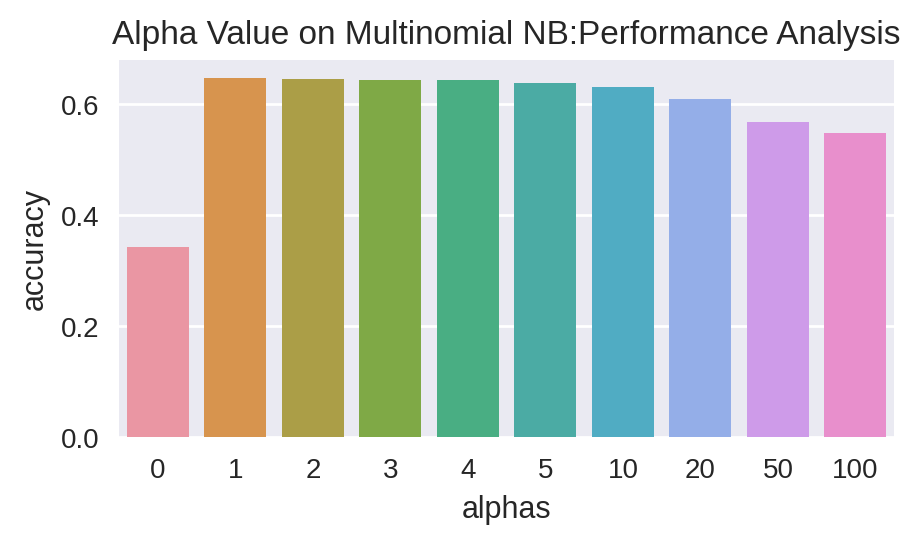

In [ ]:
import numpy as np
alphas = [0,1,2,3,4,5,10,20,50,100]
ACCs = [0,0,0,0,0,0,0,0,0,0]
vectorizer = CountVectorizer(stop_words = stopwords,max_df = 0.5,max_features = 5000)
x_train_vec_20 = vectorizer.fit_transform(x_train_20)

for i in range(len(alphas)):
  ACCs[i] = 1 - kfoldCV(cross_validation_split(x_train_vec_20, y_train_20),MultinomialNaiveBayes(alpha = alphas[i]))

import matplotlib.pyplot as plt

temp_dict = {'alphas': alphas, 'accuracy': ACCs} 
df = pd.DataFrame(temp_dict)
sns.color_palette("pastel")
plt.title("Alpha Value on Multinomial NB:Performance Analysis")
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [5, 2.5]
sns.barplot(x= "alphas", y="accuracy", data= df)

print("The best performing alpha is ",alphas[np.argmax(ACCs)])

  Accuracy as Function of Dataset Size Between the Datasets

In [ ]:
def random_select(x,y,percentage):
  (N,_)= x.shape
  inds = np.random.permutation(N)  # shuffle the data before splitting 
  #split the dataset into train and validation set
  x_train = x[inds[:(int(N*percentage))]]
  y_train = y[inds[:(int(N*percentage))]]
  return x_train,y_train

In [ ]:
percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
perf = [0,0,0,0,0,0,0,0,0,0] #first 5 belongs to dataset1, second 5 belongs to dataset2
datasets = ['dataset 1','dataset 1','dataset 1','dataset 1','dataset 1','dataset 2','dataset 2','dataset 2','dataset 2','dataset 2']

for dataset in range(2):
  for j in range(len(percentages)):
    if (dataset == 0):
      x_train = x_train_vec_20
      y_train = y_train_20
      x_test = x_test_vec_20
      y_test = y_test_20
    else:
      x_train = x_train_vec_140
      y_train = y_train_140
      x_test = x_test_vec_140
      y_test = y_test_140
    x_train,y_train = random_select(x_train,y_train,percentages[j])
    model = MultinomialNaiveBayes()
    model.fit(x_train,y_train)#we use multinomial here because it is our best performing model
    y_prob = model.predict(x_test)
    y_pred = np.argmax(y_prob, 1)
    perf[(dataset*5)+j] = np.sum(y_pred == y_test)/y_pred.shape[0]

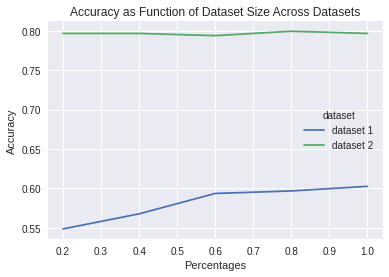

In [ ]:
import matplotlib.pyplot as plt

percentages = [0.2, 0.4, 0.6, 0.8, 1.0, 0.2, 0.4, 0.6, 0.8, 1.0]
temp_dict = {'Percentages': percentages, 'Accuracy': perf, 'dataset':datasets} 
df = pd.DataFrame(temp_dict)
sns.color_palette("pastel")
plt.title("Accuracy as Function of Dataset Size Across Datasets")
# plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [5, 2.5]

plt.grid(True)
sns.despine()
sns.lineplot(x="Percentages", y="Accuracy", data= df, hue = 'dataset')

Accuracy as Function of Dataset1's Size Between the Models (Multinomial NB vs. logistic Regression)

In [ ]:
'''
Without loss of generality, here we use Dataset 1 for comparison.

Don't forget to run random_select function first
'''
from sklearn.linear_model import LogisticRegression

percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
perf = [0,0,0,0,0,0,0,0,0,0] #first 5 belongs to dataset1, second 5 belongs to dataset2
models = ['Multinomial NB','Multinomial NB','Multinomial NB','Multinomial NB','Multinomial NB','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression']

x_test = x_test_vec_20
y_test = y_test_20

for sleep in range(2):
  for j in range(len(percentages)):
    x_train,y_train = random_select(x_train_vec_20,y_train_20,percentages[j])
    if (sleep == 0):
      model = MultinomialNaiveBayes()
      model.fit(x_train,y_train) #we use multinomial here because it is our best performing model
      y_prob = model.predict(x_test)
      y_pred = np.argmax(y_prob, 1)
      perf[(sleep*5)+j] = np.sum(y_pred == y_test)/y_pred.shape[0]
    else:
      clf = LogisticRegression(random_state=0, max_iter= 100).fit(x_train, y_train)
      score = clf.score(x_test,y_test)
      perf[(sleep*5)+j] = score
    
    

The best performing model is Multinomial Naives Bayes with 100% of the training set used for training


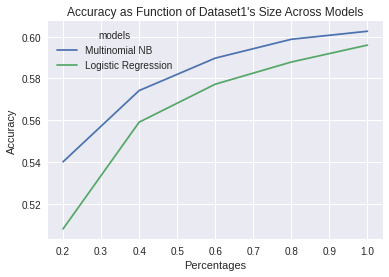

In [ ]:
import matplotlib.pyplot as plt

percentages = [0.2, 0.4, 0.6, 0.8, 1.0, 0.2, 0.4, 0.6, 0.8, 1.0]
temp_dict = {'Percentages': percentages, 'Accuracy': perf, 'models':models} 
df = pd.DataFrame(temp_dict)
sns.color_palette("pastel")
plt.title("Accuracy as Function of Dataset1's Size Across Models")
# plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [5, 2.5]

plt.grid(True)
sns.despine()
sns.lineplot(x="Percentages", y="Accuracy", data= df, hue = 'models')

print("The best performing model is Multinomial Naives Bayes with 100% of the training set used for training")

Accuracy as Function of Dataset_2's Size Between the Models (Multinomial NB vs. logistic Regression)

In [ ]:
'''
Here we use Dataset 2 for comparison.

Don't forget to run random_select function first
'''
from sklearn.linear_model import LogisticRegression

percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
perf = [0,0,0,0,0,0,0,0,0,0] #first 5 belongs to dataset1, second 5 belongs to dataset2
models = ['Multinomial NB','Multinomial NB','Multinomial NB','Multinomial NB','Multinomial NB','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression']

x_test = x_test_vec_140
y_test = y_test_140

for sleep in range(2):
  for j in range(len(percentages)):
    x_train,y_train = random_select(x_train_vec_140,y_train_140,percentages[j])
    if (sleep == 0): #first model
      model = MultinomialNaiveBayes()
      model.fit(x_train,y_train) #we use multinomial here because it is our best performing model
      y_prob = model.predict(x_test)
      y_pred = np.argmax(y_prob, 1)
      perf[(sleep*5)+j] = np.sum(y_pred == y_test)/y_pred.shape[0]
    else:#second model
      clf = LogisticRegression(random_state=0, max_iter= 100).fit(x_train, y_train)
      score = clf.score(x_test,y_test)
      perf[(sleep*5)+j] = score
    
    

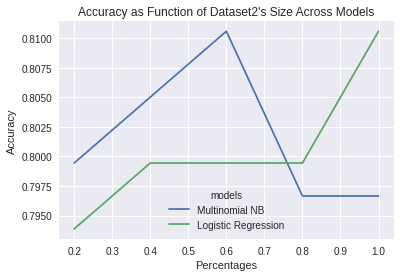

In [ ]:
import matplotlib.pyplot as plt

percentages = [0.2, 0.4, 0.6, 0.8, 1.0, 0.2, 0.4, 0.6, 0.8, 1.0]
temp_dict = {'Percentages': percentages, 'Accuracy': perf, 'models':models} 
df = pd.DataFrame(temp_dict)
sns.color_palette("pastel")
plt.title("Accuracy as Function of Dataset2's Size Across Models")
# plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [5, 2.5]

plt.grid(True)
sns.despine()
sns.lineplot(x="Percentages", y="Accuracy", data= df, hue = 'models')



# Final Results

Running Naive Bayes and Logistic Regression Models with the best hyperparameters chosen from cross-validation

Dataset 1

In [ ]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, penalty='l2',max_iter=100)
clf.fit(x_train_vec_20, y_train_20)
print("20 newsgroup dataset logistic regression:")
score = clf.score(x_test_vec_20,y_test_20)
print("model accuracy: ", score)

# Multinomial Naive Bayes 
MNB = MultinomialNaiveBayes(alpha=1)
MNB.fit(x_train_vec_20, y_train_20)
y_prob_20 = MNB.predict(x_test_vec_20)
y_pred_20 = np.argmax(y_prob_20, 1)
print("20 newsgroup dataset multinomial naive bayes:")
evaluate_acc(y_test_20, y_pred_20)

20 newsgroup dataset logistic regression:
model accuracy:  0.5969198088157196
20 newsgroup dataset multinomial naive bayes:
model accuracy: 0.6026287838555496


Dataset 2

In [ ]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, penalty='l2',max_iter=100)
clf.fit(x_train_vec_140, y_train_140)
print("sentiment140 dataset logistic regression:")
score = clf.score(x_test_vec_140,y_test_140)
print("model accuracy: ", score)

# Multinomial Naive Bayes 
MNB = MultinomialNaiveBayes(alpha=1)
MNB.fit(x_train_vec_140, y_train_140)
y_prob_140 = MNB.predict(x_test_vec_140)
y_pred_140 = np.argmax(y_prob_140, 1)
print("sentiment140 dataset multinomial naive bayes:")
evaluate_acc(y_test_140, y_pred_140)

sentiment140 dataset logistic regression:
model accuracy:  0.8105849582172702
sentiment140 dataset multinomial naive bayes:
model accuracy: 0.7966573816155988
